In [1]:
#Imports
import pandas as pd
import prepare as p
import explore as e
import model as m
import dev_wrangle as w

# Acquire

In [2]:
df= pd.read_json('data2.json')

# Prepare

In [3]:
df = w.prepare_df(df)

# Explore

In [4]:
train, val, test = w.train_val_test(df, stratify= 'language')

#### 1. What are the most common words in READMEs?

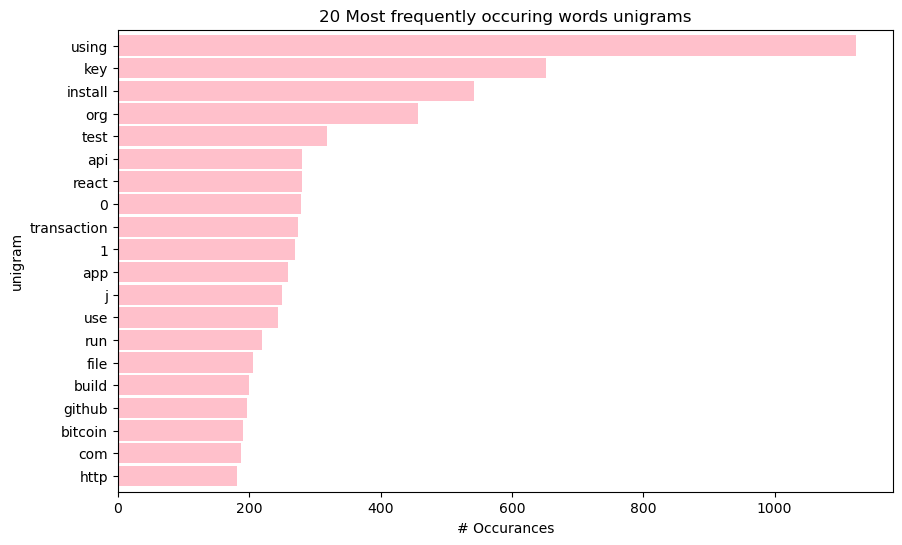

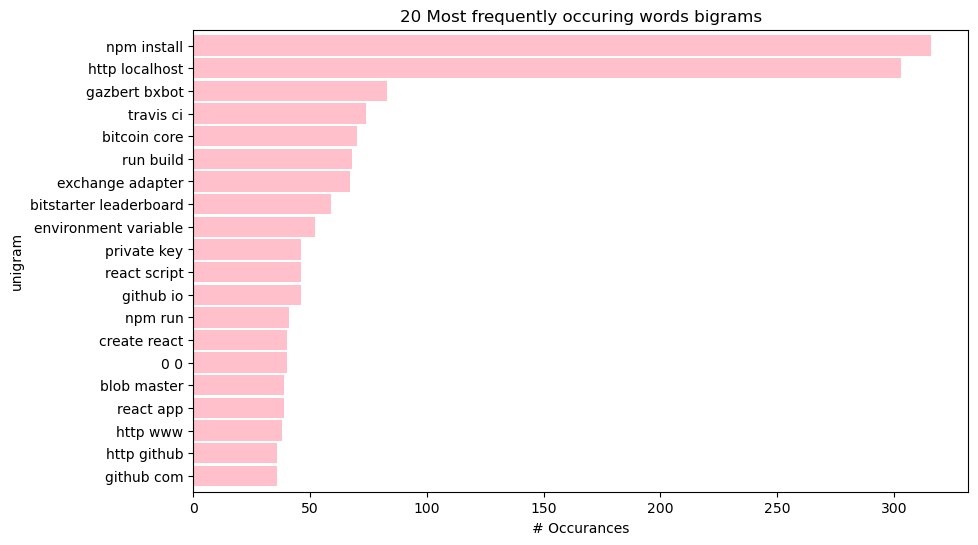

In [5]:
e.Q1(train)

#### Takeaway

#### 2. Does the length of the README vary by programming language?

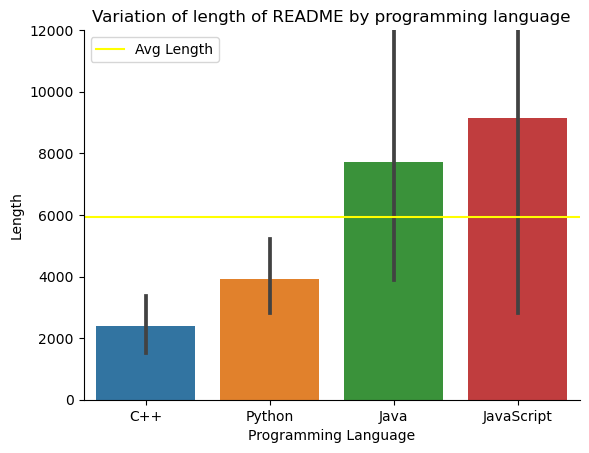

In [6]:
e.Q2(train)

#### Takeaway

#### 3. Do different programming languages use a different number of unique words?

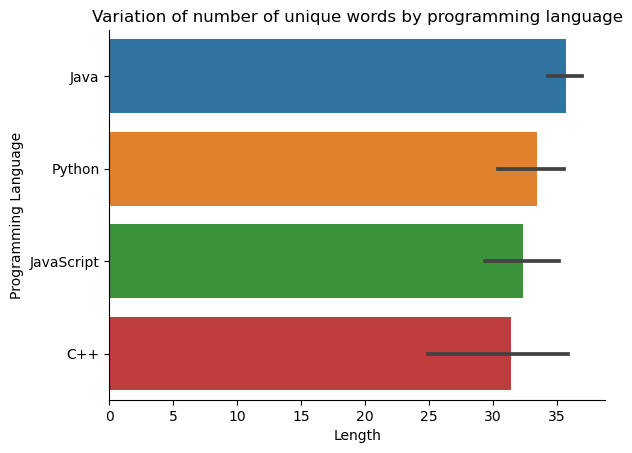

In [7]:
e.Q3(train)

#### Takeaway

In [8]:
#split data
X_train, y_train, X_val, y_val, X_test, y_test = w.x_y_split(df, 'language')

# Model

In [9]:
m.get_baseline_accuracy(y_train)

Baseline accuracy: 39.0 %


In [10]:
X_train_tfid, X_val_tfid, X_test_tfid = m.get_tfid(X_train, X_val, X_test, y_train, y_val, y_test)

In [11]:
models_df = m.get_models_accuracy(X_train_tfid, X_val_tfid, y_train, y_val)
models_df

,train_accuracy,validate_accuracy,difference
Decision_Tree(max_depth=4),0.763158,0.76,0.003158
Random_Forest(min_samples_lead=7),0.631579,0.56,0.071579
KNN (Neighours=4),0.736842,0.72,0.016842


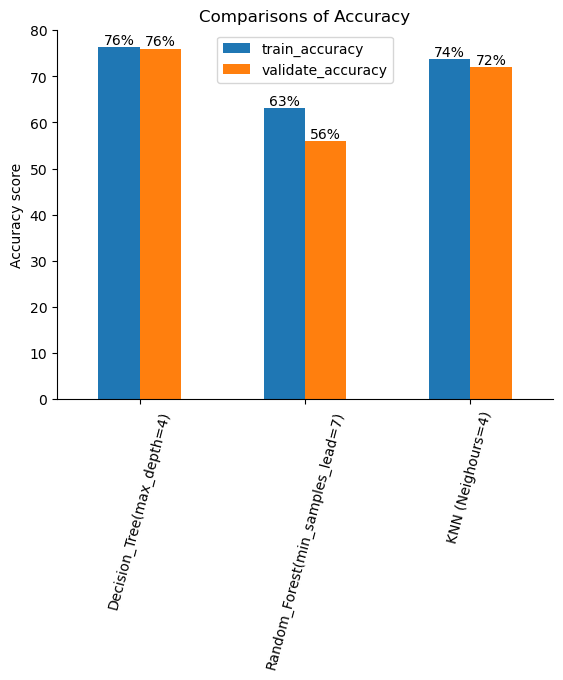

In [12]:
m.viz_models_accuracy(models_df)

In [13]:
#run best model on test set
m.get_decison_tree_test(X_train_tfid, X_test_tfid, y_train, y_test, 4)

validate Accuracy: 65.0 %


# Conclusion